In [1]:
import os
os.chdir("D:\SmartInterz\Fertilizers_Recommendation_ System_For_Disease_ Prediction")

In [2]:
ls

 Volume in drive D is New Volume
 Volume Serial Number is E068-C60A

 Directory of D:\SmartInterz\Fertilizers_Recommendation_ System_For_Disease_ Prediction

30-07-2022  23:25    <DIR>          .
30-07-2022  20:40    <DIR>          ..
06-04-2022  14:27    <DIR>          Dataset Plant Disease
30-07-2022  21:48       111,314,488 fruit.h5
30-07-2022  23:25       111,924,368 veg.h5
               2 File(s)    223,238,856 bytes
               3 Dir(s)  312,048,472,064 bytes free


# Image Augumentation for fruits

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
train_datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)

In [9]:
pwd

'D:\\SmartInterz\\Fertilizers_Recommendation_ System_For_Disease_ Prediction'

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
train_datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)

In [12]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [13]:
x_train=train_datagen.flow_from_directory(r"D:/SmartInterz/Fertilizers_Recommendation_ System_For_Disease_ Prediction/Dataset Plant Disease/fruit-dataset/fruit-dataset/Train",target_size=(64,64),
                                        class_mode='categorical',batch_size=24)

Found 5384 images belonging to 6 classes.


In [14]:
x_test=test_datagen.flow_from_directory(r"D:/SmartInterz/Fertilizers_Recommendation_ System_For_Disease_ Prediction/Dataset Plant Disease/fruit-dataset/fruit-dataset/Test",target_size=(64,64),
                                        class_mode='categorical',batch_size=24)

Found 1686 images belonging to 6 classes.


In [15]:
x_train.class_indices

{'Apple___Black_rot': 0,
 'Apple___healthy': 1,
 'Corn_(maize)___Northern_Leaf_Blight': 2,
 'Corn_(maize)___healthy': 3,
 'Peach___Bacterial_spot': 4,
 'Peach___healthy': 5}

# CNN for fruits

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten

In [17]:
model=Sequential()

In [18]:
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation='relu'))

In [19]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [20]:
model.add(Flatten())

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 30752)             0         
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [22]:
5384/24

224.33333333333334

In [23]:
len(x_train)

225

# Hidden for fruits

In [24]:
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))

# Output for fruits

In [25]:
model.add(Dense(6,activation='softmax'))

In [26]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [27]:
len(x_test)
x_test
x_train

In [28]:
model.fit_generator(x_train,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test),epochs=10)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
225/225 [==============================] - 34s 153ms/step - loss: 0.7315 - accuracy: 0.7686 - val_loss: 0.2641 - val_accuracy: 0.9128
Epoch 2/10
225/225 [==============================] - 35s 154ms/step - loss: 0.3089 - accuracy: 0.8930 - val_loss: 0.1894 - val_accuracy: 0.9342
Epoch 3/10
225/225 [==============================] - 34s 151ms/step - loss: 0.2495 - accuracy: 0.9155 - val_loss: 0.2072 - val_accuracy: 0.9253
Epoch 4/10
225/225 [==============================] - 37s 165ms/step - loss: 0.2052 - accuracy: 0.9276 - val_loss: 0.2295 - val_accuracy: 0.9199
Epoch 5/10
225/225 [==============================] - 33s 149ms/step - loss: 0.1660 - accuracy: 0.9402 - val_loss: 0.1116 - val_accuracy: 0.9609
Epoch 6/10
225/225 [==============================] - 34s 150ms/step - loss: 0.1530 - accuracy: 0.9473 - val_loss: 0.1174 - val_accuracy: 0.9555
Epoch 7/10
225/225 [==============================] - 

In [29]:
pwd

'D:\\SmartInterz\\Fertilizers_Recommendation_ System_For_Disease_ Prediction'

In [30]:
model.save('fruit.h5')

# Test the fruits model

In [31]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [32]:
#load the model
model=load_model('fruit.h5')

In [33]:
img=image.load_img(r"D:/SmartInterz/Fertilizers_Recommendation_ System_For_Disease_ Prediction/Dataset Plant Disease/fruit-dataset/fruit-dataset/test/Apple___Black_rot/00e909aa-e3ae-4558-9961-336bb0f35db3___JR_FrgE.S 8593.jpg")

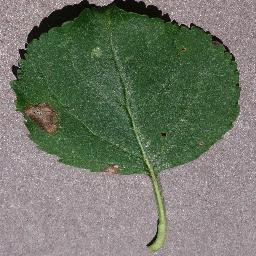

In [34]:
img

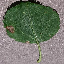

In [35]:
img=image.load_img(r"D:/SmartInterz/Fertilizers_Recommendation_ System_For_Disease_ Prediction/Dataset Plant Disease/fruit-dataset/fruit-dataset/test/Apple___Black_rot/00e909aa-e3ae-4558-9961-336bb0f35db3___JR_FrgE.S 8593.jpg",target_size=(64,64))
img

In [36]:
x=image.img_to_array(img)
x

array([[[144., 129., 132.],
        [135., 120., 123.],
        [146., 131., 134.],
        ...,
        [163., 148., 151.],
        [194., 179., 182.],
        [147., 132., 135.]],

       [[167., 152., 155.],
        [156., 141., 144.],
        [181., 166., 169.],
        ...,
        [147., 132., 135.],
        [156., 141., 144.],
        [144., 129., 132.]],

       [[155., 140., 143.],
        [177., 162., 165.],
        [122., 107., 110.],
        ...,
        [145., 130., 133.],
        [135., 120., 123.],
        [137., 122., 125.]],

       ...,

       [[179., 166., 173.],
        [171., 158., 165.],
        [126., 113., 120.],
        ...,
        [148., 136., 140.],
        [162., 150., 154.],
        [162., 150., 154.]],

       [[164., 151., 158.],
        [141., 128., 135.],
        [152., 139., 146.],
        ...,
        [148., 136., 140.],
        [175., 163., 167.],
        [155., 143., 147.]],

       [[160., 147., 154.],
        [161., 148., 155.],
        [155., 1

In [37]:
x=np.expand_dims(x,axis=0)
x

array([[[[144., 129., 132.],
         [135., 120., 123.],
         [146., 131., 134.],
         ...,
         [163., 148., 151.],
         [194., 179., 182.],
         [147., 132., 135.]],

        [[167., 152., 155.],
         [156., 141., 144.],
         [181., 166., 169.],
         ...,
         [147., 132., 135.],
         [156., 141., 144.],
         [144., 129., 132.]],

        [[155., 140., 143.],
         [177., 162., 165.],
         [122., 107., 110.],
         ...,
         [145., 130., 133.],
         [135., 120., 123.],
         [137., 122., 125.]],

        ...,

        [[179., 166., 173.],
         [171., 158., 165.],
         [126., 113., 120.],
         ...,
         [148., 136., 140.],
         [162., 150., 154.],
         [162., 150., 154.]],

        [[164., 151., 158.],
         [141., 128., 135.],
         [152., 139., 146.],
         ...,
         [148., 136., 140.],
         [175., 163., 167.],
         [155., 143., 147.]],

        [[160., 147., 154.],
       

In [38]:
y=np.argmax(model.predict(x),axis=1)


In [39]:
x_train.class_indices

{'Apple___Black_rot': 0,
 'Apple___healthy': 1,
 'Corn_(maize)___Northern_Leaf_Blight': 2,
 'Corn_(maize)___healthy': 3,
 'Peach___Bacterial_spot': 4,
 'Peach___healthy': 5}

In [47]:
index=['Apple___Black_rot','Apple___healthy','Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy','Peach___Bacterial_spot',
 'Peach___healthy']

In [48]:
img=image.load_img(r"D:/SmartInterz/Fertilizers_Recommendation_ System_For_Disease_ Prediction/Dataset Plant Disease/fruit-dataset/fruit-dataset/test/Apple___Black_rot/00e909aa-e3ae-4558-9961-336bb0f35db3___JR_FrgE.S 8593.jpg",target_size=(64,64))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
index=['Apple___Black_rot','Apple___healthy','Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy','Peach___Bacterial_spot',
 'Peach___healthy']
index[y[0]]

'Apple___Black_rot'

In [49]:
# img=image.load_img(r"D:/SmartInterz/Fertilizers_Recommendation_ System_For_Disease_ Prediction/Dataset Plant Disease/fruit-dataset/fruit-dataset/test/Apple___healthy/00fca0da-2db3-481b-b98a-9b67bb7b105c___RS_HL 7708.jpg",target_size=(64,64))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
#index=['bears','crows','elephants','rats']
index[y[0]]

'Apple___Black_rot'

In [46]:
img=image.load_img(r"D:/SmartInterz/Fertilizers_Recommendation_ System_For_Disease_ Prediction/Dataset Plant Disease/fruit-dataset/fruit-dataset/test/Peach___Bacterial_spot/00f87dfc-bf6c-481e-9022-bfb98224d4b7___Rutg._Bact.S 1965.jpg",target_size=(64,64))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
#index=['bears','crows','elephants','rats']
index[y[0]]

'Apple___healthy'

# Model Building for Vegetables

In [50]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True,vertical_flip=False)

test_datagen=ImageDataGenerator(rescale=1./255)


In [51]:
x_train=train_datagen.flow_from_directory(r"D:/SmartInterz/Fertilizers_Recommendation_ System_For_Disease_ Prediction/Dataset Plant Disease/Veg-dataset/Veg-dataset/train_set",target_size=(64,64),
                                        class_mode='categorical',batch_size=24)

x_test=test_datagen.flow_from_directory(r"D:/SmartInterz/Fertilizers_Recommendation_ System_For_Disease_ Prediction/Dataset Plant Disease/Veg-dataset/Veg-dataset/test_set",target_size=(64,64),
                                        class_mode='categorical',batch_size=24)



Found 11386 images belonging to 9 classes.
Found 3416 images belonging to 9 classes.


In [52]:
x_train.class_indices

{'Pepper,_bell___Bacterial_spot': 0,
 'Pepper,_bell___healthy': 1,
 'Potato___Early_blight': 2,
 'Potato___Late_blight': 3,
 'Potato___healthy': 4,
 'Tomato___Bacterial_spot': 5,
 'Tomato___Late_blight': 6,
 'Tomato___Leaf_Mold': 7,
 'Tomato___Septoria_leaf_spot': 8}

In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Convolution2D,MaxPooling2D,Flatten

model=Sequential()

model.add(Convolution2D(64,(3,3),input_shape=(64,64,3),activation='relu'))
model.add(Convolution2D(32, kernel_size=3, activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.summary()







#create model
#model = Sequential()
#add model layers
#model.add(Conv2D(64, kernel_size=3, activation=’relu’, input_shape=(28,28,1)))
#model.add(Conv2D(32, kernel_size=3, activation=’relu’))
#model.add(Flatten())
#model.add(Dense(10, activation=’softmax’))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 62, 62, 64)        1792      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 60, 60, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 28800)             0         
Total params: 20,256
Trainable params: 20,256
Non-trainable params: 0
_________________________________________________________________


In [58]:
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))

# Output for fruits

model.add(Dense(9,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

len(x_test)
x_test
x_train

In [59]:
model.fit_generator(x_train,steps_per_epoch=len(x_train),validation_data=x_test,validation_steps=len(x_test),epochs=10)

Epoch 1/10
475/475 [==============================] - 155s 326ms/step - loss: 1.0761 - accuracy: 0.6120 - val_loss: 0.8561 - val_accuracy: 0.6923
Epoch 2/10
475/475 [==============================] - 159s 335ms/step - loss: 0.5791 - accuracy: 0.7969 - val_loss: 0.4075 - val_accuracy: 0.8557
Epoch 3/10
475/475 [==============================] - 147s 309ms/step - loss: 0.4261 - accuracy: 0.8513 - val_loss: 0.2399 - val_accuracy: 0.9189
Epoch 4/10
475/475 [==============================] - 141s 298ms/step - loss: 0.3685 - accuracy: 0.8692 - val_loss: 0.3900 - val_accuracy: 0.8648
Epoch 5/10
475/475 [==============================] - 147s 308ms/step - loss: 0.3027 - accuracy: 0.8929 - val_loss: 0.2884 - val_accuracy: 0.8961
Epoch 6/10
475/475 [==============================] - 131s 275ms/step - loss: 0.2592 - accuracy: 0.9087 - val_loss: 0.2735 - val_accuracy: 0.9131
Epoch 7/10
475/475 [==============================] - 133s 279ms/step - loss: 0.2314 - accuracy: 0.9213 - val_loss: 0.1823 -

In [60]:
model.save('veg.h5')

In [61]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [62]:
#load the model
model=load_model('veg.h5')

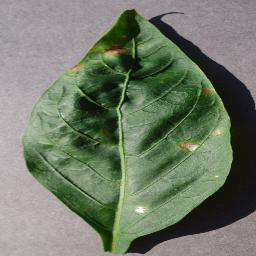

In [69]:
img=image.load_img(r"D:/SmartInterz/Fertilizers_Recommendation_ System_For_Disease_ Prediction/Dataset Plant Disease/Veg-dataset/Veg-dataset/test_set/Pepper,_bell___Bacterial_spot/ad921dec-e88f-41d8-9455-0880c69063fc___NREC_B.Spot 9216.jpg")
img

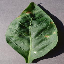

In [71]:
img=image.load_img(r"D:/SmartInterz/Fertilizers_Recommendation_ System_For_Disease_ Prediction/Dataset Plant Disease/Veg-dataset/Veg-dataset/test_set/Pepper,_bell___Bacterial_spot/ad921dec-e88f-41d8-9455-0880c69063fc___NREC_B.Spot 9216.jpg",target_size=(64,64))
img

In [72]:
x=image.img_to_array(img)
x

array([[[155., 148., 155.],
        [157., 150., 157.],
        [155., 148., 155.],
        ...,
        [128., 121., 128.],
        [139., 132., 139.],
        [135., 128., 135.]],

       [[166., 159., 166.],
        [164., 157., 164.],
        [172., 165., 172.],
        ...,
        [139., 132., 139.],
        [140., 133., 140.],
        [139., 132., 139.]],

       [[164., 157., 164.],
        [166., 159., 166.],
        [171., 164., 171.],
        ...,
        [138., 131., 138.],
        [136., 129., 136.],
        [135., 128., 135.]],

       ...,

       [[174., 168., 168.],
        [175., 169., 169.],
        [178., 172., 172.],
        ...,
        [143., 131., 133.],
        [149., 137., 139.],
        [140., 128., 130.]],

       [[174., 168., 168.],
        [177., 171., 171.],
        [176., 170., 170.],
        ...,
        [136., 124., 126.],
        [143., 131., 133.],
        [146., 134., 136.]],

       [[179., 173., 173.],
        [174., 168., 168.],
        [179., 1

In [73]:
x=np.expand_dims(x,axis=0)
x

array([[[[155., 148., 155.],
         [157., 150., 157.],
         [155., 148., 155.],
         ...,
         [128., 121., 128.],
         [139., 132., 139.],
         [135., 128., 135.]],

        [[166., 159., 166.],
         [164., 157., 164.],
         [172., 165., 172.],
         ...,
         [139., 132., 139.],
         [140., 133., 140.],
         [139., 132., 139.]],

        [[164., 157., 164.],
         [166., 159., 166.],
         [171., 164., 171.],
         ...,
         [138., 131., 138.],
         [136., 129., 136.],
         [135., 128., 135.]],

        ...,

        [[174., 168., 168.],
         [175., 169., 169.],
         [178., 172., 172.],
         ...,
         [143., 131., 133.],
         [149., 137., 139.],
         [140., 128., 130.]],

        [[174., 168., 168.],
         [177., 171., 171.],
         [176., 170., 170.],
         ...,
         [136., 124., 126.],
         [143., 131., 133.],
         [146., 134., 136.]],

        [[179., 173., 173.],
       

In [74]:
y=np.argmax(model.predict(x),axis=1)

In [75]:
x_train.class_indices

{'Pepper,_bell___Bacterial_spot': 0,
 'Pepper,_bell___healthy': 1,
 'Potato___Early_blight': 2,
 'Potato___Late_blight': 3,
 'Potato___healthy': 4,
 'Tomato___Bacterial_spot': 5,
 'Tomato___Late_blight': 6,
 'Tomato___Leaf_Mold': 7,
 'Tomato___Septoria_leaf_spot': 8}

In [80]:
index=['Pepper,_bell___Bacterial_spot','Pepper,_bell___healthy','Potato___Early_blight','Potato___Late_blight','Potato___healthy',
 'Tomato___Bacterial_spot', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot']

In [81]:
img=image.load_img(r"D:/SmartInterz/Fertilizers_Recommendation_ System_For_Disease_ Prediction/Dataset Plant Disease/Veg-dataset/Veg-dataset/test_set/Pepper,_bell___Bacterial_spot/ad921dec-e88f-41d8-9455-0880c69063fc___NREC_B.Spot 9216.jpg",target_size=(64,64))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
y=np.argmax(model.predict(x),axis=1)
#index=['Apple___Black_rot','Apple___healthy','Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy','Peach___Bacterial_spot',
# 'Peach___healthy']
index[y[0]]

'Pepper,_bell___Bacterial_spot'